In [1]:
import numpy as np
import h5py
import os
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import scipy.io as sio  
from scipy.io import loadmat  
import seaborn as sns
from numpy import correlate

np.set_printoptions(suppress=True)
from pylab import *
import scipy.io as sio  

In [2]:
file = "2022-01-20T15-00-00vHip1_big_filtered_sorted.mat"
hf = h5py.File(file, "r")

In [3]:
hf.keys()

<KeysViewHDF5 ['V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch1', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch10', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch11', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch12', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch13', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch14', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch2', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch202', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch205', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch206', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch208', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch209', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch211', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch214', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch215', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch216', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch217', 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch218', 'V20

Liczba kanałów:

In [4]:
num_channels = len(hf.keys())
print(f"Liczba kanałów: {num_channels}")

Liczba kanałów: 50


Czy wszystkie kanałay mają times?

In [5]:
channels_without_spikes = []

for channel in hf.keys():
    if 'times' not in hf[channel]:
        channels_without_spikes.append(channel)

print(f"Kanały bez danych o spajkach (bez 'times'): {channels_without_spikes}")
print(f"Liczba tych kanałów: {len(channels_without_spikes)}")

Kanały bez danych o spajkach (bez 'times'): []
Liczba tych kanałów: 0


Zebranie wszystkich czasów spajków z kanałów (lista):

In [6]:
all_spike_times = []
file = "2022-01-20T15-00-00vHip1_big_filtered_sorted.mat"
with h5py.File(file, "r") as hf:
    for channel_name in hf.keys():
        if 'times' in hf[channel_name]:
            spike_times = hf[channel_name]['times'][:]
            all_spike_times.extend(spike_times)

print(f"Liczba zebranych czasów spajków: {len(all_spike_times)}")

Liczba zebranych czasów spajków: 50


In [7]:
print("Czasy spajków:")
print(all_spike_times)

Czasy spajków:
[array([    2.368   ,    24.958   ,    51.2189  ,    90.6058  ,
         127.5486  ,   161.7284  ,   172.181   ,   216.88685 ,
         233.5887  ,   260.3525  ,   286.99145 ,   302.0728  ,
         344.9723  ,   359.36775 ,   378.3485  ,   408.02005 ,
         427.317   ,   427.3227  ,   449.8679  ,   486.3081  ,
         493.92415 ,   510.6978  ,   536.05455 ,   554.2323  ,
         554.23795 ,   601.49445 ,   617.49775 ,   653.7612  ,
         688.8854  ,   740.85015 ,   759.08495 ,   786.08205 ,
         830.1947  ,   844.0883  ,   888.5831  ,   945.78805 ,
         975.9654  ,  1002.75505 ,  1034.7115  ,  1080.0861  ,
        1120.65385 ,  1146.04535 ,  1160.78515 ,  1180.41995 ,
        1192.41065 ,  1213.6996  ,  1233.26075 ,  1233.2663  ,
        1240.3449  ,  1268.4789  ,  1282.73775 ,  1302.78095 ,
        1315.2796  ,  1331.2042  ,  1347.12935 ,  1378.39975 ,
        1400.08425 ,  1438.06775 ,  1455.67625 ,  1470.73295 ,
        1490.945   ,  1514.83535 ,  153

Zebranie wszystkich czasów spajków z kanałów (słownik):

In [8]:
file = "2022-01-20T15-00-00vHip1_big_filtered_sorted.mat"
hf = h5py.File(file, "r")

spike_times_dict = {}

for group_name in hf.keys():
    if 'times' in hf[group_name]:
        spike_times = hf[group_name]['times'][:]
        spike_times_dict[group_name] = spike_times

print(f"\nCollected spike times from {len(spike_times_dict)} groups.")


Collected spike times from 50 groups.


Scatter plot dla wszystkich kanałów:

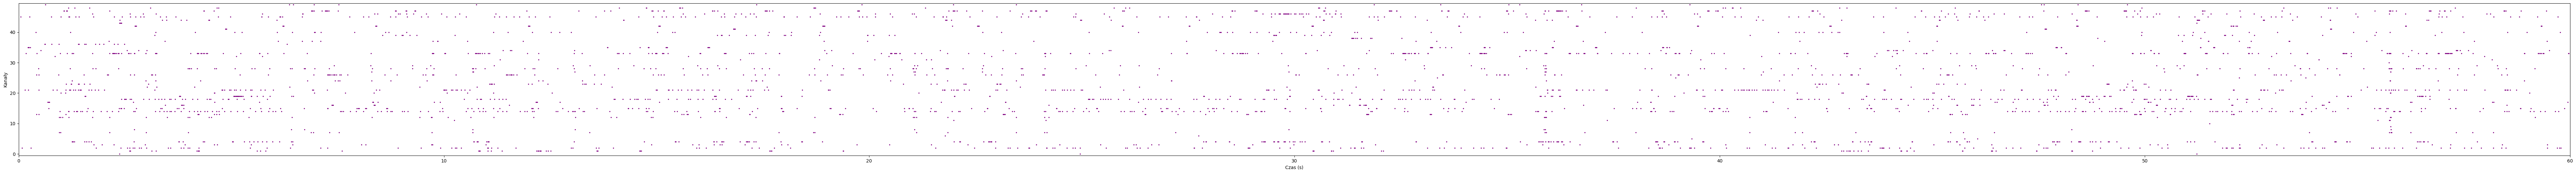

In [9]:
num_channels = len(spike_times_dict)
sampling_rate = 1000  
num_steps = 12600 * 1000  # bo 12600 sekund * sampling_rate

spike_matrix = np.zeros((num_channels, num_steps))

for i, (channel_name, spike_times) in enumerate(spike_times_dict.items()):
    spike_times = spike_times.flatten()
    for spike_time in spike_times:
        index = int(spike_time * sampling_rate)  # zamiana czasu na próbki
        if index < num_steps:
            spike_matrix[i, index] = 1

plt.figure(figsize=(100, 6))

for i in range(num_channels):
    spike_indices = np.where(spike_matrix[i, :] == 1)[0]
    plt.scatter(spike_indices / sampling_rate, np.full_like(spike_indices, i), s=2, color='purple')

plt.xlabel("Czas (s)")
plt.ylabel("Kanały")
plt.xlim([0,60])
plt.ylim(-0.5, num_channels - 0.5) 
plt.show()

Poniżej to samo z wykorzystaniem rzadkiej macierzy (lil_matrix) - z powodu MemoryError, który się pojawia w momencie ustawienia sampling_rate=20000 w kodzie powyżej

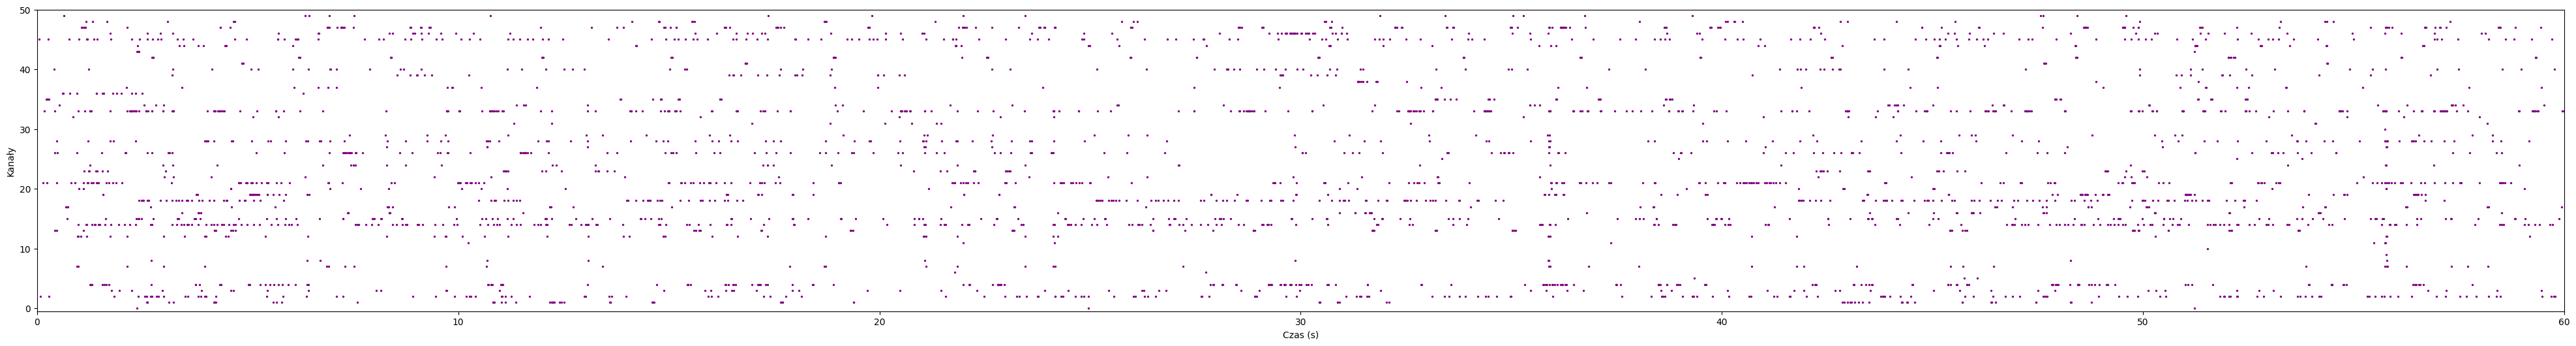

In [10]:
from scipy.sparse import lil_matrix

num_channels = len(spike_times_dict)
sampling_rate = 20000
num_steps = 12600 * sampling_rate

spike_matrix = lil_matrix((num_channels, num_steps), dtype=bool)

for i, (channel_name, spike_times) in enumerate(spike_times_dict.items()):
    spike_times = spike_times.flatten()
    for spike_time in spike_times:
        index = int(spike_time * sampling_rate)
        if index < num_steps:
            spike_matrix[i, index] = 1

plt.figure(figsize=(50, 6))

for i in range(num_channels):
    spike_indices = spike_matrix[i, :].nonzero()[1]
    plt.scatter(spike_indices / sampling_rate, np.full_like(spike_indices, i), s=2, color='purple')

plt.xlabel("Czas (s)")
plt.ylabel("Kanały")
plt.xlim([0,60])
plt.ylim(-0.5, num_channels - 0.5)
plt.yticks(range(0, num_channels + 1, 10))
plt.show()

### Single channel: Ch1

In [11]:
file = "2022-01-20T15-00-00vHip1_big_filtered_sorted.mat"
with h5py.File(file, "r") as hf:
    channel = 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch1'
    print(f"Zawartość kanału '{channel}': {list(hf[channel].keys())}")
    
    spikes = hf[channel]['times'][:] # w formie tablicy numpy
    print("Dane 'times':", spikes)

    num_times = spikes.size 
    print(f"Liczba danych w times: {num_times}")

Zawartość kanału 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch1': ['codes', 'comment', 'interval', 'items', 'length', 'offset', 'resolution', 'scale', 'times', 'title', 'traces', 'trigger', 'units', 'values']
Dane 'times': [[    2.368       24.958       51.2189      90.6058     127.5486
    161.7284     172.181      216.88685    233.5887     260.3525
    286.99145    302.0728     344.9723     359.36775    378.3485
    408.02005    427.317      427.3227     449.8679     486.3081
    493.92415    510.6978     536.05455    554.2323     554.23795
    601.49445    617.49775    653.7612     688.8854     740.85015
    759.08495    786.08205    830.1947     844.0883     888.5831
    945.78805    975.9654    1002.75505   1034.7115    1080.0861
   1120.65385   1146.04535   1160.78515   1180.41995   1192.41065
   1213.6996    1233.26075   1233.2663    1240.3449    1268.4789
   1282.73775   1302.78095   1315.2796    1331.2042    1347.12935
   1378.39975   1400.08425   1438.06775   1455.67625  

Scatter plot dla jednego kanału

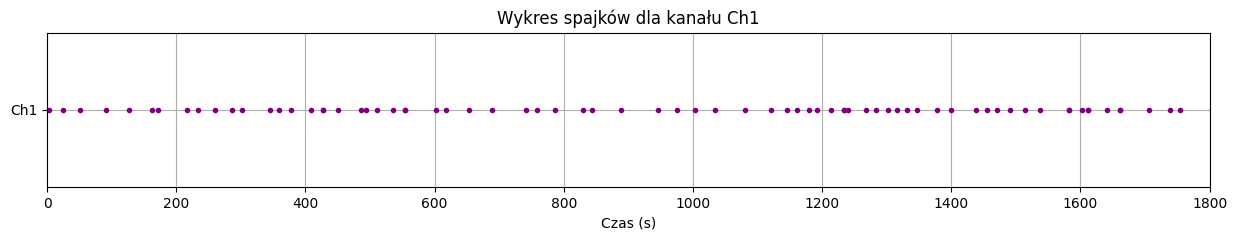

In [12]:
plt.figure(figsize=(15, 2))
plt.plot(spikes, np.ones_like(spikes), '.', color='purple') 
plt.xlim([0, 1800])
plt.ylim([0, 2])
plt.xlabel('Czas (s)')
plt.title('Wykres spajków dla kanału Ch1')
plt.yticks([1], ['Ch1'])
plt.grid(True)
plt.show()

Ile jest spajków w danym przedziale?

In [13]:
time_range = (spikes >= 0) & (spikes <= 1800)
spikes_in_range = spikes[time_range]

num_spikes_in_range = len(spikes_in_range)
print(f"Liczba spajków w przedziale 0-1800 s: {num_spikes_in_range}")

Liczba spajków w przedziale 0-1800 s: 74


Za pomocą plt.scatter() i ze spłaszczeniem flatten():

Liczba spajków: 768


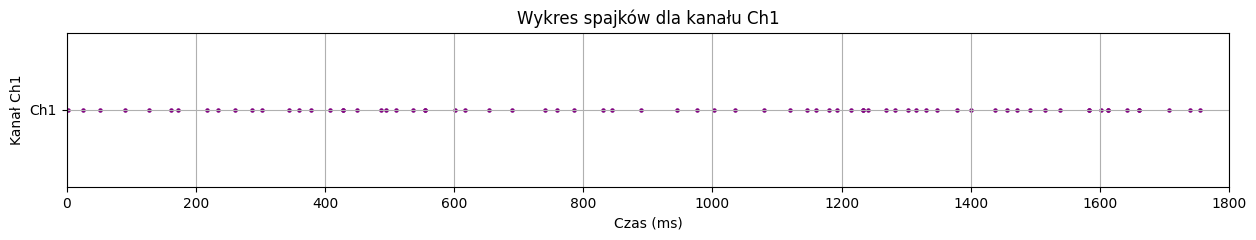

In [14]:
file = "2022-01-20T15-00-00vHip1_big_filtered_sorted.mat"
with h5py.File(file, "r") as hf:
    channel = 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch1'
    
    spikes = hf[channel]['times'][:]
    if spikes.ndim > 1:
        spikes = spikes.flatten()

    num_spikes = len(spikes)
    print(f"Liczba spajków: {num_spikes}")

    plt.figure(figsize=(15, 2))
    plt.scatter(spikes, [1] * num_spikes, s=5, color='purple', label='Spajki')
    plt.title("Wykres spajków dla kanału Ch1")
    plt.xlabel("Czas (ms)")  
    plt.ylabel("Kanał Ch1")
    plt.xlim([0,1800])
    plt.yticks([1], ['Ch1'])
    plt.grid(True)
    plt.show()

Scatter plot dla dwóch kanałów

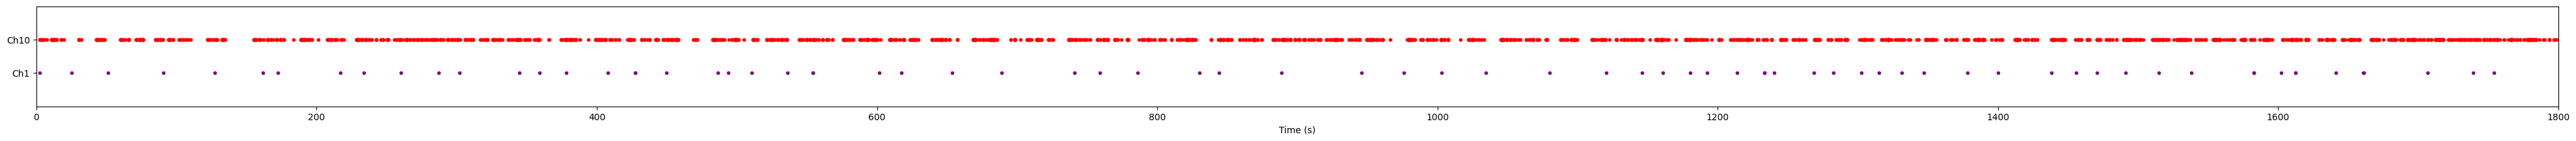

In [15]:
file = "2022-01-20T15-00-00vHip1_big_filtered_sorted.mat"
with h5py.File(file, "r") as hf:
    channel = 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch1'
    
    spikes = hf[channel]['times'][:]

with h5py.File(file, "r") as hf:
    channel10 = 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch10'
    
    spikes10 = hf[channel10]['times'][:]
    
plt.figure(figsize=(50, 2))

plt.plot(spikes, np.ones_like(spikes), '.', color='purple') 
plt.plot(spikes10, 2 * np.ones_like(spikes10), '.', color='red')   

plt.xlim([0,1800]) 
plt.ylim([0, 3])
plt.xlabel('Time (s)') 
plt.yticks([1, 2], ['Ch1', 'Ch10'])
plt.show()

ISI

In [16]:
ISIs = np.diff(spikes)
print(ISIs)

[[ 22.59      26.2609    39.3869    36.9428    34.1798    10.4526
   44.70585   16.70185   26.7638    26.63895   15.08135   42.8995
   14.39545   18.98075   29.67155   19.29695    0.0057    22.5452
   36.4402     7.61605   16.77365   25.35675   18.17775    0.00565
   47.2565    16.0033    36.26345   35.1242    51.96475   18.2348
   26.9971    44.11265   13.8936    44.4948    57.20495   30.17735
   26.78965   31.95645   45.3746    40.56775   25.3915    14.7398
   19.6348    11.9907    21.28895   19.56115    0.00555    7.0786
   28.134     14.25885   20.0432    12.49865   15.9246    15.92515
   31.2704    21.6845    37.9835    17.6085    15.0567    20.21205
   23.89035   23.2008    44.57315    0.00575   19.34535   10.42365
    0.0056    28.8286    19.6559     0.11765   45.89445   32.3163
   15.06395   49.9344    37.1101    27.5623    20.00505   26.47915
   33.62015   19.15745   39.3147    13.28315   23.81775   43.7413
   23.1504    20.064649  47.371251  41.715249  17.636151  30.81345
   

In [17]:
print("Typ danych ISIs:", type(ISIs))
print("Kształt ISIs:", np.array(ISIs).shape)

print("Min wartość ISIs:", np.min(ISIs))
print("Max wartość ISIs:", np.max(ISIs))

Typ danych ISIs: <class 'numpy.ndarray'>
Kształt ISIs: (1, 767)
Min wartość ISIs: 0.005450000000564614
Max wartość ISIs: 107.67525000000023


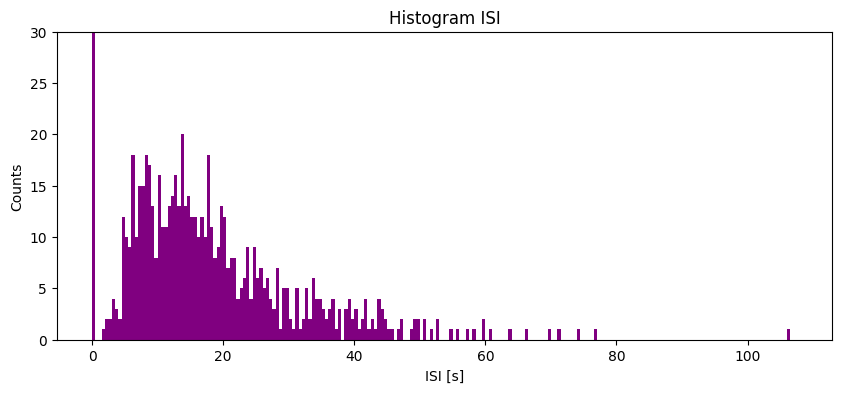

In [18]:
ISIs_flatten = ISIs.flatten()
bins = np.arange(0, 108, 0.5)
plt.figure(figsize=(10, 4))
plt.hist(ISIs_flatten, bins=bins, color='purple')
plt.xlabel('ISI [s]')
plt.ylabel('Counts')
plt.ylim([0,30])
plt.title('Histogram ISI')
plt.show()

Increments

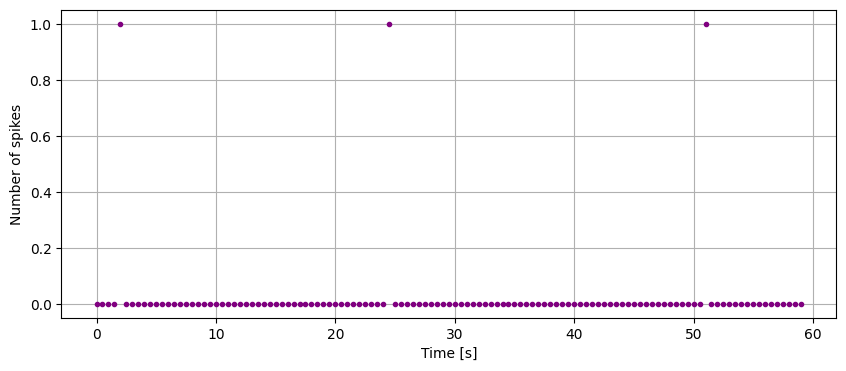

In [19]:
spikes_flat = spikes.flatten()

time_bins = np.arange(0, 60, 0.5)

increments, _ = np.histogram(spikes_flat, bins=time_bins)

plt.figure(figsize=(10, 4))
plt.plot(time_bins[:-1], increments, '.', color='purple')
plt.xlabel('Time [s]')
plt.ylabel('Number of spikes')
plt.grid(True)
plt.show()

Wartości unikalne i liczba spajków:

In [20]:
print(np.unique(increments))
print(np.sum(increments)) 

[0 1]
3


Fano Factor

In [21]:
fano_factor = increments.var() / increments.mean()
print('FF =', fano_factor)

FF = 0.974789915966387


Co oznacza wartość Fano Factor?
- FF = 1 oznacza, że zmienność liczby spajków w danych jest pojedyncza, czyli rozkład zdarzeń w czasie jest bliski rozkładowi Poissona. Taki rozkład charakteryzuje się stałą intensywnością spajków w czasie.
- FF > 1 wskazuje, że dane są bardziej rozproszone niż w przypadku rozkładu Poissona, czyli występuje większa zmienność liczby spajków w czasie. Może to oznaczać obecność pewnych procesów "skupionych" w czasie, jak np. zwiększona aktywność neuronalna w pewnych okresach.
- FF < 1 wskazuje na mniejszą zmienność niż w rozkładzie Poissona, czyli spajki pojawiają się bardziej regularnie, z mniejszymi odchyleniami w czasie. Taki wynik może sugerować bardziej "sztywną" lub "spójną" aktywność.

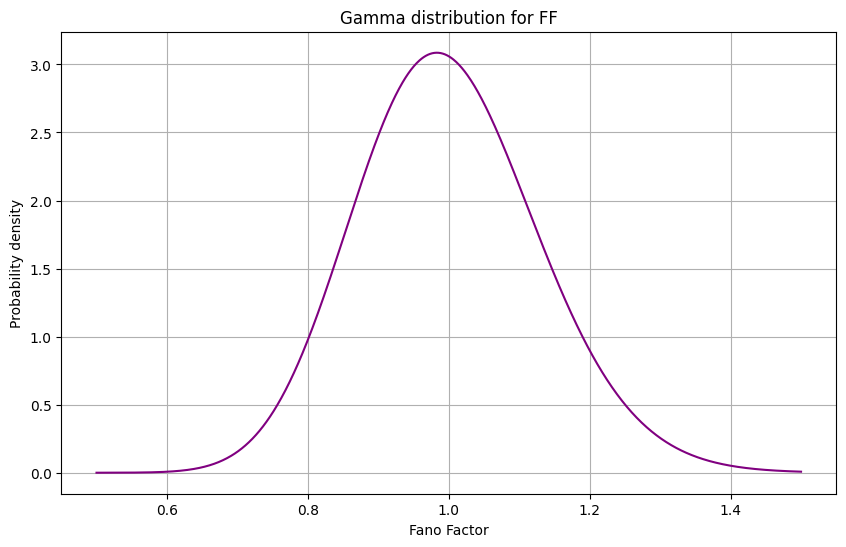

FF: 0.974789915966387
Przedział ufności dla FF: [0.76124633 1.27082118]


In [22]:
from scipy.stats import gamma

N = increments.shape[0] 
shape = (N - 1) / 2  
scale = 2 / (N - 1)

FF = np.linspace(0.5, 1.5, 1000)
Y = gamma.pdf(FF, shape, scale=scale)

plt.figure(figsize=(10, 6))
plt.plot(FF, Y, color='purple')
plt.xlabel('Fano Factor')
plt.ylabel('Probability density')
plt.title('Gamma distribution for FF')
plt.grid(True)
plt.show()

print(f'FF: {fano_factor}')
confidence_interval = gamma.ppf([0.025, 0.975], shape, scale=scale)
print(f'Przedział ufności dla FF: {confidence_interval}')

Autokorelacja

In [23]:
def autocorr(x, lags):
    xcorr = correlate(x - x.mean(), x - x.mean(), 'full') 
    xcorr = xcorr[xcorr.size//2:] / xcorr.max()            
    return xcorr[:lags+1]                      
    
autocorr(increments, 3)

array([ 1.        , -0.0260794 , -0.02629673, -0.02651405])

In [24]:
time_bins = arange(0, 30, 0.001)                 
increments1, _ = histogram(spikes, time_bins) 
acf= autocorr(increments1, 100)                

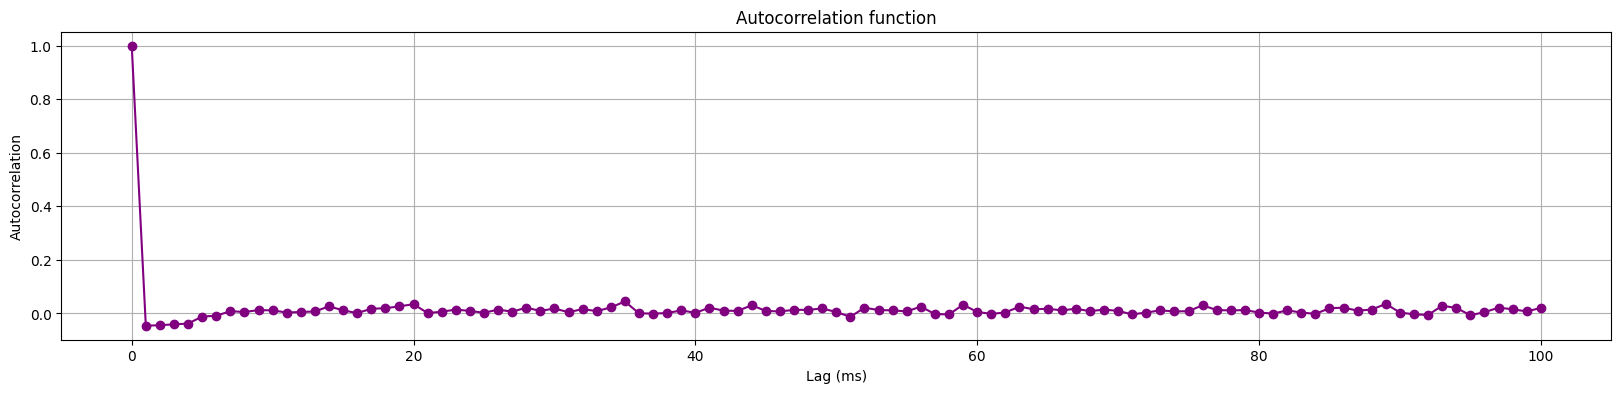

In [25]:
time_bins = np.arange(0, np.max(spikes), 1) 
increments1, _ = np.histogram(spikes, bins=time_bins)
acf = autocorr(increments1, 100)

plt.figure(figsize=(20, 4))
plt.plot(range(len(acf)), acf, marker='o', color='purple')
plt.xlabel('Lag (ms)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation function')
plt.grid(True)
plt.show()

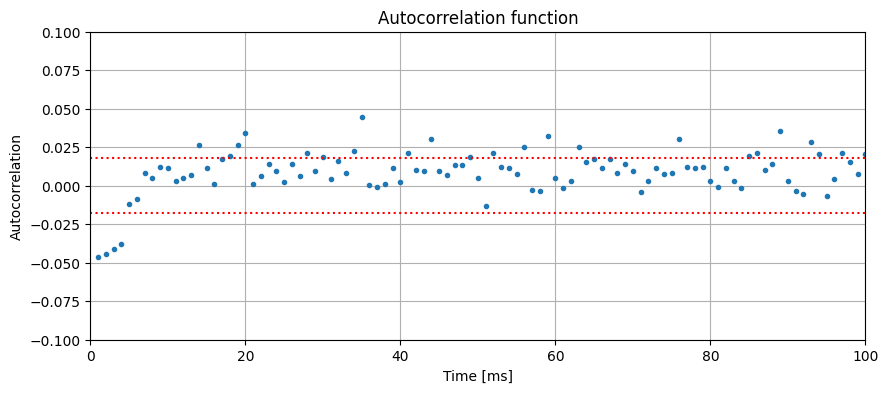

In [26]:
plt.figure(figsize=(10, 4))
plot(acf, '.')                
N1 = len(increments1)          
sig = 2 / sqrt(N1)  

plot([0, 100], [sig, sig], 'r:')  
plot([0, 100], [-sig, -sig], 'r:')
xlim([0, 100])                
ylim([-.1, .1])  
plt.title('Autocorrelation function')             
xlabel('Time [ms]')               
ylabel('Autocorrelation')
plt.grid(True)  
show()

In [27]:
print(np.unique(increments1))
print(np.sum(increments1))

print(increments1[:50])
print(len(increments1))

[0 1 2 3 4]
767
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
12577


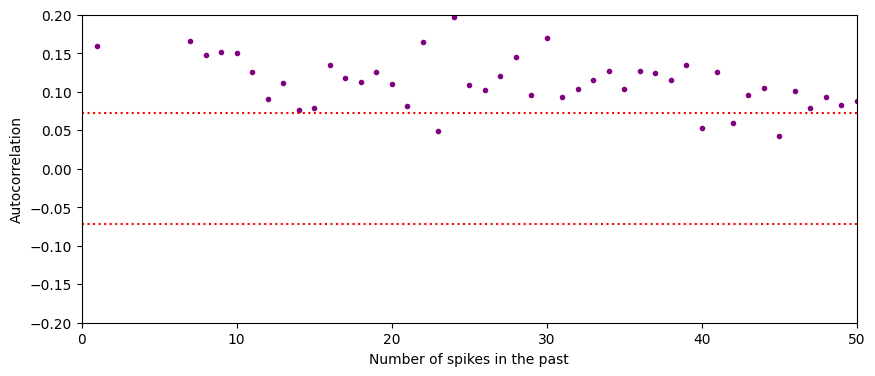

In [28]:
# spłaszczenie tablicy, jeśli ma więcej niż jeden wymiar
if ISIs.ndim > 1:
    ISIs = ISIs.flatten()

def autocorr(x, lags):
    xcorr = correlate(x - np.mean(x), x - np.mean(x), 'full')  
    xcorr = xcorr[xcorr.size//2:] / np.max(np.abs(xcorr))  
    return xcorr[:lags+1]

ISI_acf = autocorr(ISIs, 50)

plt.figure(figsize=(10, 4))
plt.plot(ISI_acf, '.', color='purple')
N3 = len(ISIs) 
sd = 1 / np.sqrt(N3)  

plt.plot(2 * sd * np.ones_like(ISI_acf), 'r:')
plt.plot(-2 * sd * np.ones_like(ISI_acf), 'r:')
plt.xlim([0, 50])
plt.ylim([-.2, .2])
plt.xlabel('Number of spikes in the past')
plt.ylabel('Autocorrelation')
plt.show()

In [29]:
# from numpy import correlate, sqrt

# increments1 = np.random.poisson(5, 600)

# def autocorr(x, lags):
#     xcorr = correlate(x - np.mean(x), x - np.mean(x), 'full')  
#     xcorr = xcorr[xcorr.size // 2:] / xcorr.max()
#     return xcorr[:lags+1] 
# lags = 100
# acf = autocorr(increments1, lags)

# N1 = len(increments1)
# sig = 2 / sqrt(N1)

# plt.figure(figsize=(8, 6))
# plt.plot(acf, '.', color='purple')

# plt.plot([0, 100], [sig, sig], 'r:')
# plt.plot([0, 100], [-sig, -sig], 'r:')
# plt.xlim([0, 100]) 
# plt.ylim([-0.1, 0.1])
# plt.xlabel('Time [ms]')
# plt.ylabel('Autocorrelation')
# plt.title('Autocorrelation of spike train increments')
# plt.show()

Statistical models

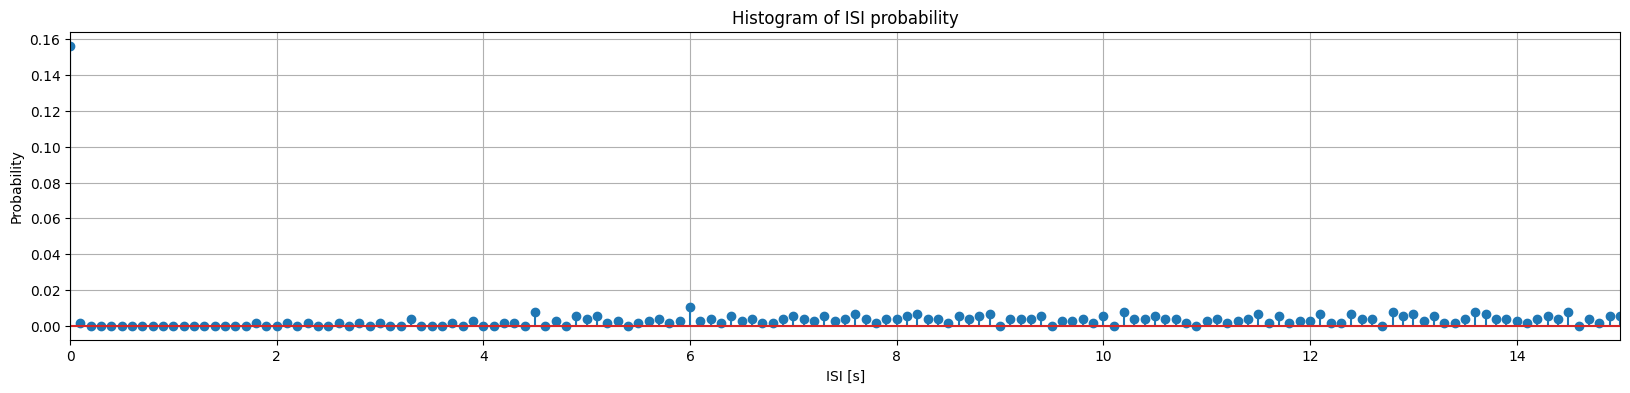

In [30]:
bins = arange(0, 108, 0.1)         
counts, _ = histogram(ISIs, bins) 
prob = counts / len(ISIs)  
fig, ax = plt.subplots(figsize=(20, 4))     
ax.stem(bins[:-1], prob)                
ax.set_xlim([0, 15])                   
xlabel('ISI [s]')                        
ylabel('Probability')
title('Histogram of ISI probability')
grid(True)
show()

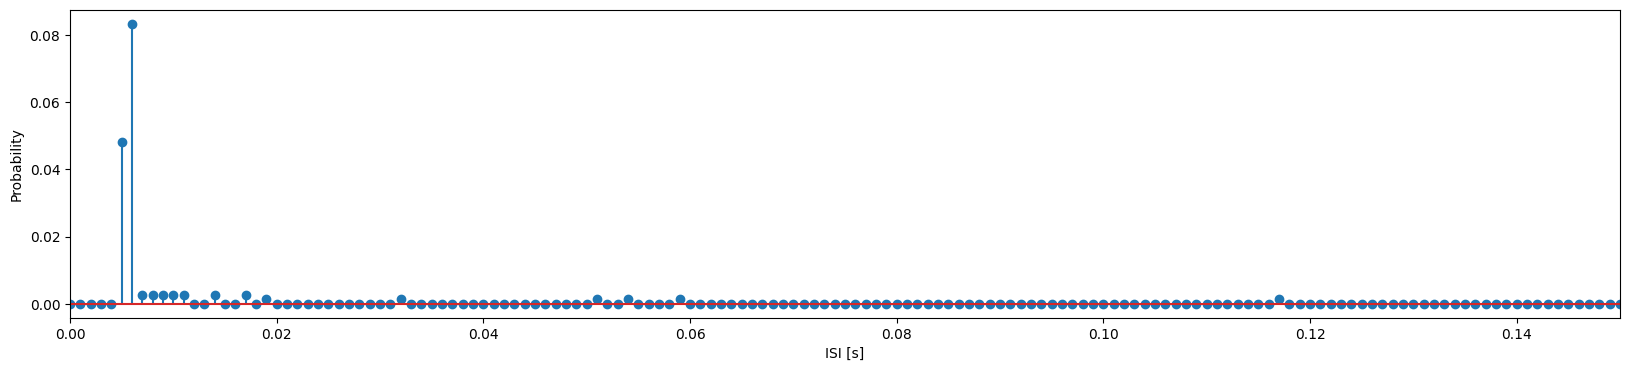

In [31]:
bins = arange(0, .5, 0.001)         
counts, _ = histogram(ISIs, bins)
prob = counts / len(ISIs)
fig, ax = subplots(figsize=(20, 4))                
ax.stem(bins[:-1], prob)                
ax.set_xlim([0, 0.15])                   
xlabel('ISI [s]')                      
ylabel('Probability')
show()

In [32]:
sum_prob = np.sum(prob)
print(f"Suma prawdopodobieństw: {sum_prob}")

Suma prawdopodobieństw: 0.1577574967405476


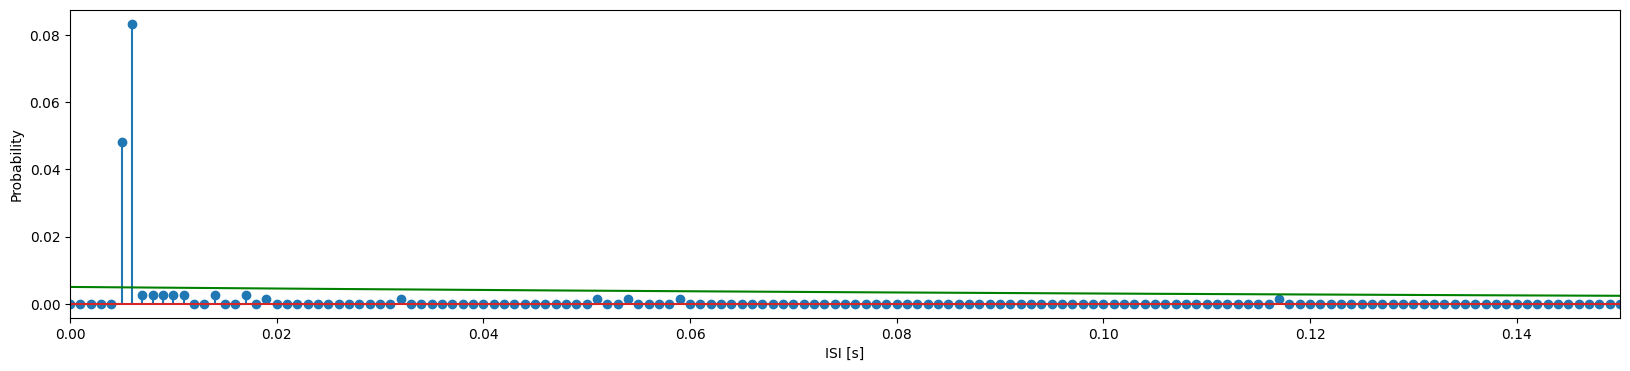

In [33]:
l = 5                    
model = l * exp(-l * bins) * 0.001  
ax.plot(bins, model, 'g')          
fig

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
C:\Users\hp\AppData\Local\Temp\ipykernel_18896\520113654.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$')
C:\Users\hp\AppData\Local\Temp\ipykernel_18896\520113654.py:10: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Likelihood dla różnych wartości $\lambda$')


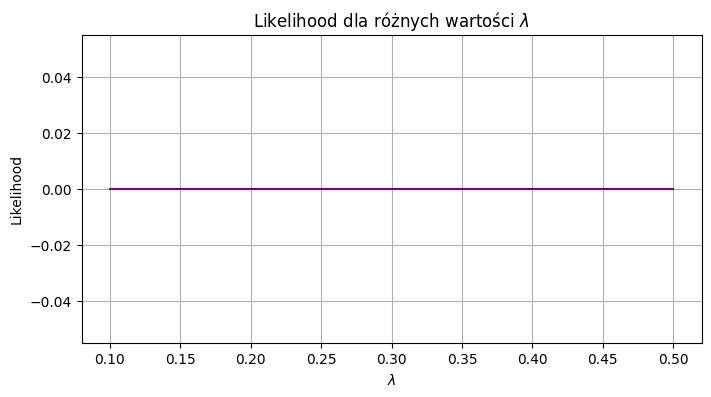

In [34]:
lambdas = np.linspace(0.1, 0.5, 100)
N3 = len(ISIs)
L = lambdas**N3 * np.exp(-lambdas * sum(ISIs))


plt.subplots(figsize=(8, 4))  
plt.plot(lambdas, L, color='purple')
plt.xlabel('$\lambda$')
plt.ylabel('Likelihood')
plt.title('Likelihood dla różnych wartości $\lambda$')
plt.grid(True)
plt.show()

jeśli ISIs są stosunkowo duże, λ zbyt małe, prawdopodobieństwo może być zbyt małe, co skutkuje poziomą linią przy 0

wartości w zmiennej L są zbyt małe, co skutkuje ich zaokrągleniem do zera

In [35]:
lambda_estimate = 1 / mean(ISIs)
print(f"Optymalna wartość λ: {lambda_estimate}")

Optymalna wartość λ: 0.06099383182579498


In [36]:
sum(ISIs)

12575.042049999998

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
C:\Users\hp\AppData\Local\Temp\ipykernel_18896\652039922.py:5: SyntaxWarning: invalid escape sequence '\l'
  xlabel('$\lambda$')


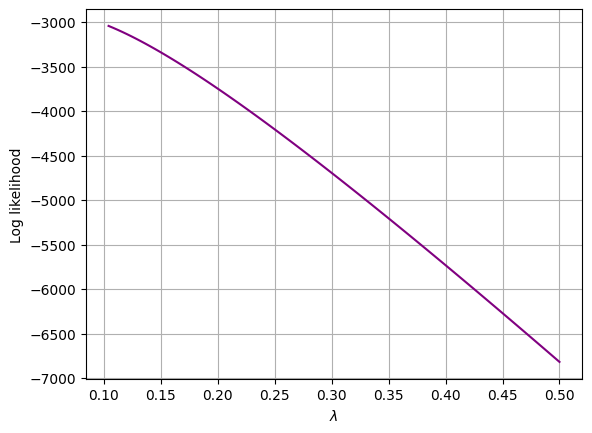

In [37]:
lambdas = lambdas[1:]  
N3 = len(ISIs)
l = N3 * log(lambdas) - lambdas * sum(ISIs) 
plot(lambdas, l, color='purple')      
xlabel('$\lambda$')
ylabel('Log likelihood')
plt.grid(True)
show()

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
C:\Users\hp\AppData\Local\Temp\ipykernel_18896\3307100942.py:5: SyntaxWarning: invalid escape sequence '\l'
  xlabel('$\lambda$')


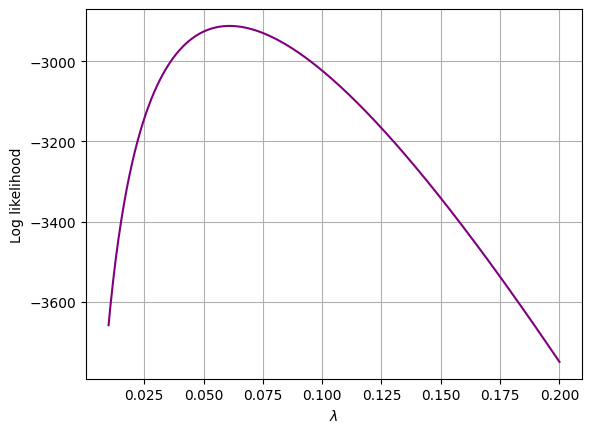

In [38]:
lambdas = np.linspace(0.01, 0.2, 500)
N3 = len(ISIs)
l = N3 * log(lambdas) - lambdas * sum(ISIs) 
plot(lambdas, l, color='purple')      
xlabel('$\lambda$')
ylabel('Log likelihood')
plt.grid(True)
show()  

wartości log likelihood są ujemne, ponieważ zawierają logarytmy liczb mniejszych od 1 

log likelihood to miara dopasowania modelu do danych - im wyższa wartość, tym lepiej model opisuje dane

maksimum funkcji log likelihood wskazuje optymalną wartość parametru λ

wartość ta maksymalizuje dopasowanie modelu Poissona do danych

In [39]:
print(f"Minimum: {np.min(l)}, maximum: {np.max(l)}")

Minimum: -3749.4472888369546, maximum: -2912.2856883096065


<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
C:\Users\hp\AppData\Local\Temp\ipykernel_18896\3049303136.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$')
C:\Users\hp\AppData\Local\Temp\ipykernel_18896\3049303136.py:10: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Log likelihood dla różnych wartości $\lambda$')


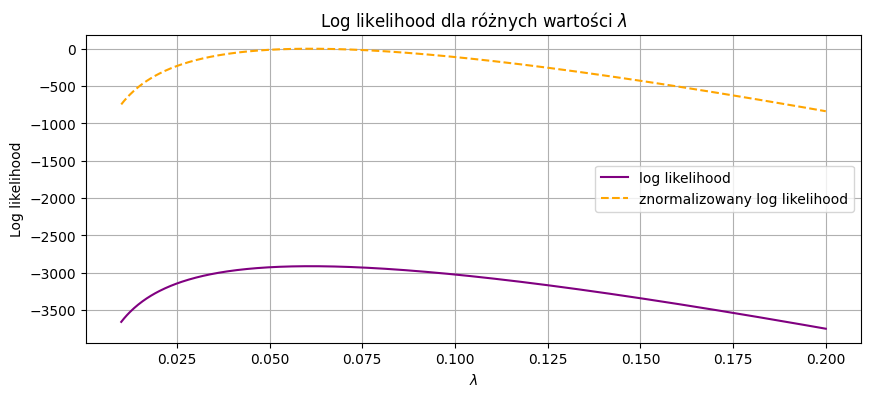

In [40]:
lambdas = np.linspace(0.01, 0.2, 500)  
log_L = N3 * np.log(lambdas) - lambdas * sum(ISIs)
log_L_norm = log_L - np.max(log_L)  #normalizacja

plt.figure(figsize=(10, 4))
plt.plot(lambdas, log_L, color='purple', label="log likelihood")
plt.plot(lambdas, log_L_norm, '--', color='orange', label="znormalizowany log likelihood") # tu max funkcji = 0
plt.xlabel('$\lambda$')
plt.ylabel('Log likelihood')
plt.title('Log likelihood dla różnych wartości $\lambda$')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# bins = arange(0, .5, 0.001)         
# counts, _ = histogram(ISIs, bins)   
# prob = counts / len(ISIs)            
# bar(bins[:-1], prob, width=0.001, color='purple')   
# lbda = 1 / ISIs.mean()               
# model = lbda * exp(-lbda * bins) * 0.001  
# plot(bins, model)                 
# xlim([0, 0.15])                     
# xlabel('ISI [s]')                         
# ylabel('Probability') 
# grid(True)                 
# show()

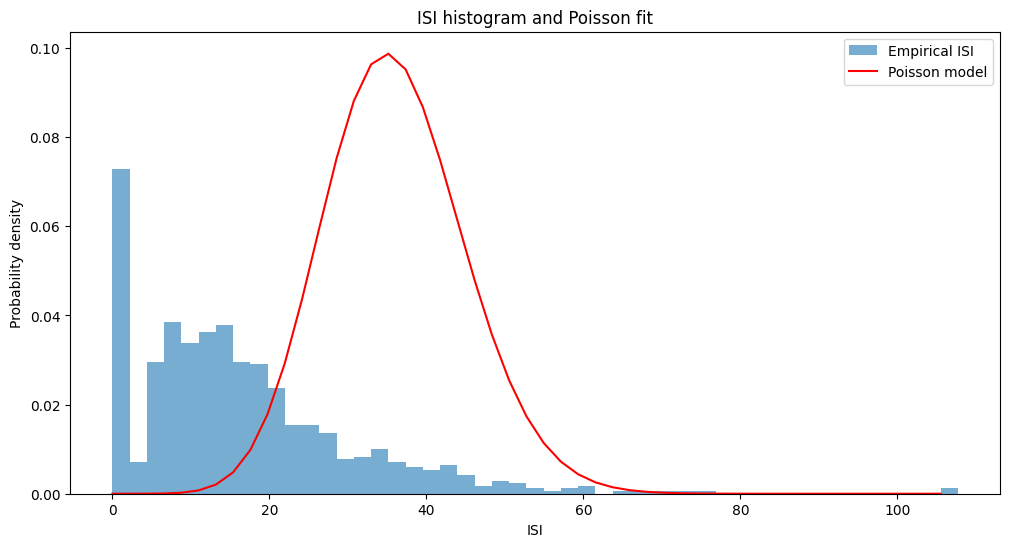

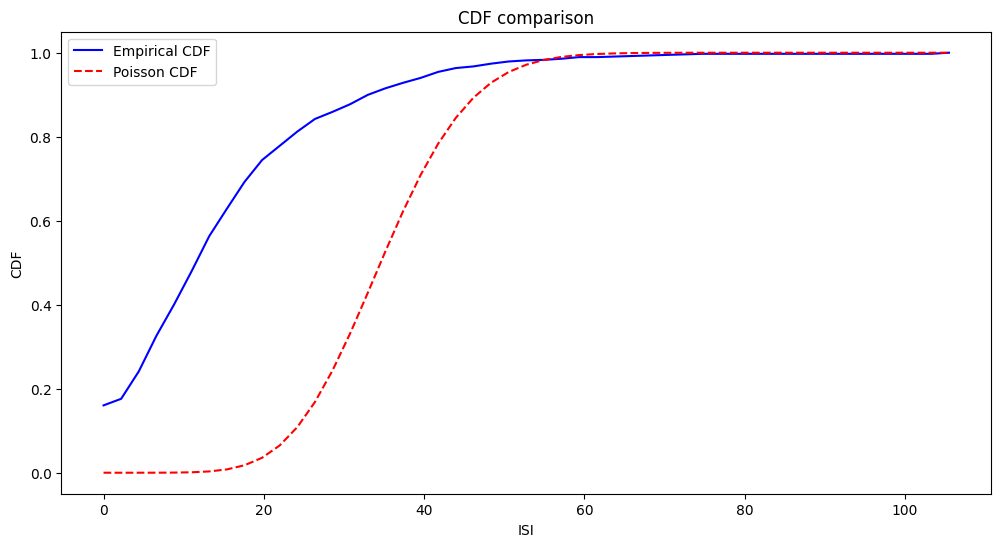

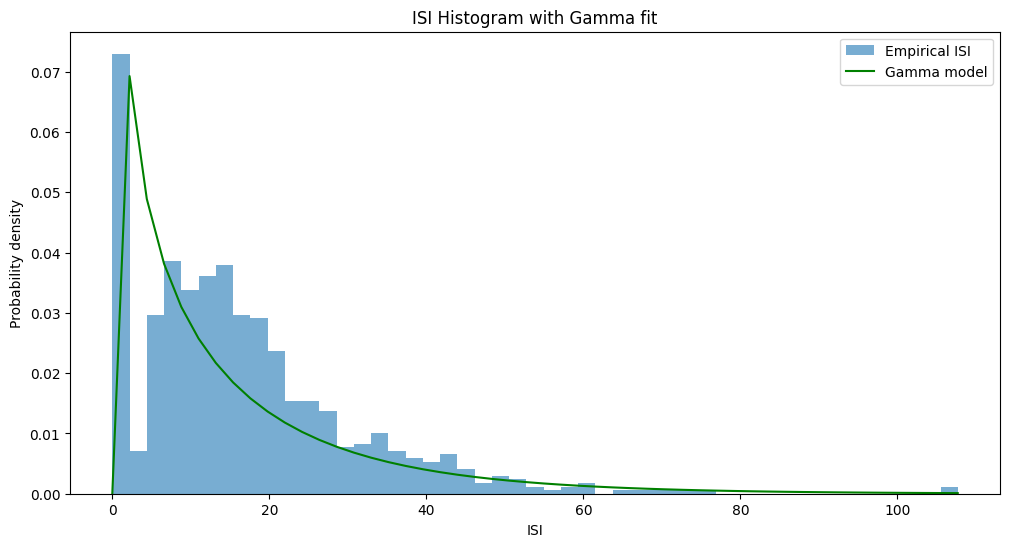

In [42]:
from scipy.stats import poisson, gamma

bins = np.linspace(0, max(ISIs), 50)

plt.figure(figsize=(12, 6))

counts, bins, _ = plt.hist(ISIs, bins=bins, density=True, alpha=0.6, label="Empirical ISI")
poisson_model = poisson.pmf(np.arange(len(bins)-1), mean(ISIs))
plt.plot(bins[:-1], poisson_model[:len(bins)-1], 'r-', label="Poisson model")
plt.title("ISI histogram and Poisson fit")
plt.xlabel("ISI")
plt.ylabel("Probability density")
plt.legend()
plt.show()

# histogram przedstawia dane empiryczne, czyli rzeczywisty rozkład odstępów czasowych między zdarzeniami (ISI)
# krzywa Poissona reprezentuje teoretyczny model, który próbujemy dopasować do tych danych

plt.figure(figsize=(12, 6))
emp_cdf = np.cumsum(np.histogram(ISIs, bins=bins, density=True)[0]) * np.diff(bins)
poisson_cdf = poisson.cdf(np.arange(len(bins)-1), mean(ISIs))

# porównanie empirycznej i teoretycznej dystrybuanty
plt.plot(bins[:-1], emp_cdf, label="Empirical CDF", color='blue')
plt.plot(bins[:-1], poisson_cdf[:len(bins)-1], 'r--', label="Poisson CDF")
plt.title("CDF comparison")
plt.xlabel("ISI")
plt.ylabel("CDF")
plt.legend()
plt.show()

gamma_params = gamma.fit(ISIs)

plt.figure(figsize=(12, 6))
plt.hist(ISIs, bins=bins, density=True, alpha=0.6, label="Empirical ISI")
plt.plot(bins, gamma.pdf(bins, *gamma_params), 'g-', label="Gamma model")
plt.title("ISI Histogram with Gamma fit")
plt.xlabel("ISI")
plt.ylabel("Probability density")
plt.legend()
plt.show()

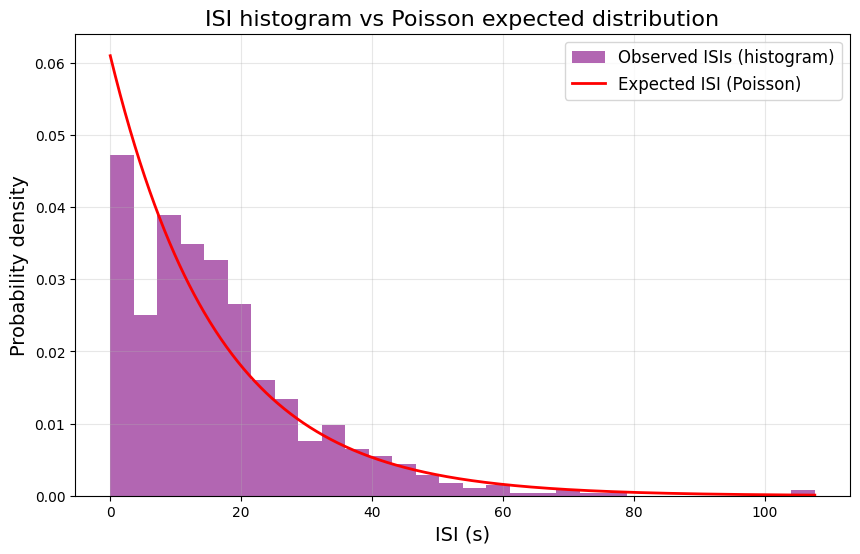

In [43]:
x_values = np.linspace(0, max(ISIs), 1000) 
expected_isi = (1 / mean(ISIs)) * np.exp(-x_values / mean(ISIs))

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(ISIs, bins=30, alpha=0.6, color='purple', label='Observed ISIs (histogram)', density=True)

bin_width = bins[1] - bins[0]  
probabilities = n / (len(ISIs) * bin_width)  

plt.plot(x_values, expected_isi, color='red', label='Expected ISI (Poisson)', linewidth=2)

plt.xlabel('ISI (s)', fontsize=14)
plt.ylabel('Probability density', fontsize=14)
plt.title('ISI histogram vs Poisson expected distribution', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Model Poissona zakłada, że:
- zdarzenia (spajki) są od siebie niezależne
- odstępy czasowe (ISI) są wykładniczo rozłożone

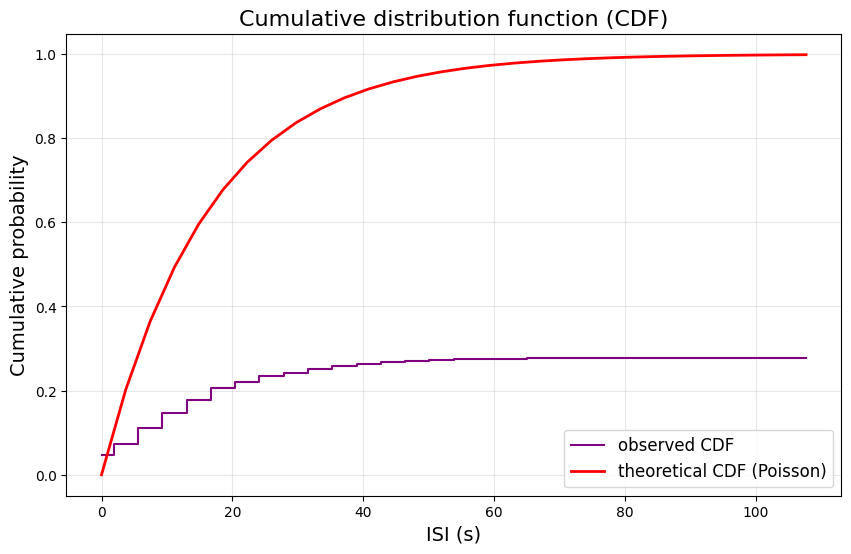

In [44]:
# porównanie CDF obserwowanego ISI z teoretycznym dla rozkładu Poissona
obs_cdf = np.cumsum(np.histogram(ISIs, bins=30, density=True)[0]) 
teo_cdf = 1 - np.exp(-np.linspace(0, max(ISIs), len(obs_cdf)) / mean(ISIs)) 

# CDF
plt.figure(figsize=(10, 6))
plt.step(np.linspace(0, max(ISIs), len(obs_cdf)), obs_cdf, where='mid', label='observed CDF', color='purple')
plt.plot(np.linspace(0, max(ISIs), len(teo_cdf)), teo_cdf, label='theoretical CDF (Poisson)', color='red', linewidth=2)
plt.xlabel('ISI (s)', fontsize=14)
plt.ylabel('Cumulative probability', fontsize=14)
plt.title('Cumulative distribution function (CDF)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

KS plot jest używany do porównywania dwóch dystrybuant (CDF) - dystrybuanty empirycznej i teoretycznej

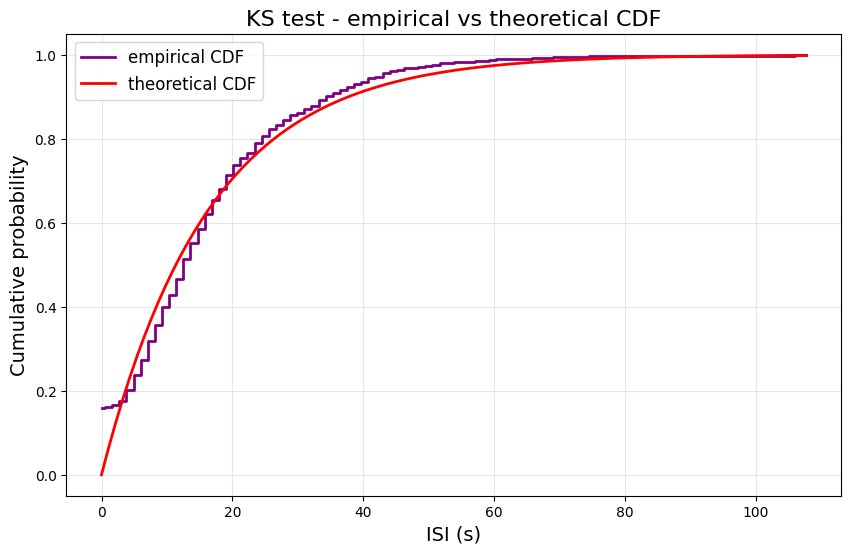

In [45]:
from scipy.stats import kstest

obs_cdf = np.cumsum(np.histogram(ISIs, bins=100, density=True)[0])  
obs_cdf /= obs_cdf[-1]

x_values = np.linspace(0, max(ISIs), len(obs_cdf))
teo_cdf = 1 - np.exp(-x_values / np.mean(ISIs))

ks_stat, p_value = kstest(ISIs, lambda x: 1 - np.exp(-x / np.mean(ISIs)))

plt.figure(figsize=(10, 6))
plt.step(x_values, obs_cdf, where='mid', label='empirical CDF', color='purple', linewidth=2)
plt.plot(x_values, teo_cdf, label='theoretical CDF', color='red', linewidth=2)

plt.xlabel('ISI (s)', fontsize=14)
plt.ylabel('Cumulative probability', fontsize=14)
plt.title('KS test - empirical vs theoretical CDF', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

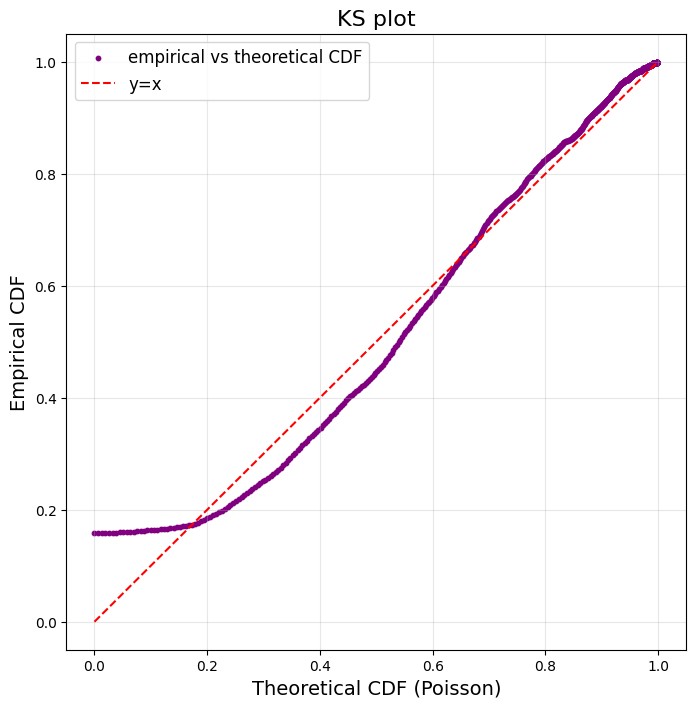

In [46]:
x_values = np.linspace(0, max(ISIs), 1000)
teo_cdf = 1 - np.exp(-x_values / np.mean(ISIs))  
obs_cdf = np.cumsum(np.histogram(ISIs, bins=100, density=True)[0])  
obs_cdf /= obs_cdf[-1]  

obs_cdf_resampled = np.interp(x_values, np.linspace(0, max(ISIs), len(obs_cdf)), obs_cdf)

plt.figure(figsize=(8, 8))
plt.scatter(teo_cdf, obs_cdf_resampled, color='purple', s=10, label='empirical vs theoretical CDF')
plt.plot([0, 1], [0, 1], 'r--', label='y=x')

plt.xlabel('Theoretical CDF (Poisson)', fontsize=14)
plt.ylabel('Empirical CDF', fontsize=14)
plt.title('KS plot', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# ----------------------------------------------

In [47]:
file = "2022-01-20T15-00-00vHip1_big_filtered_sorted.mat"
with h5py.File(file, "r") as hf:
    channel_1 = 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch1'
    channel_2 = 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch10'
    
    spikes_ch1 = hf[channel_1]['times'][:]
    spikes_ch2 = hf[channel_2]['times'][:]
    
    print(f"Liczba danych w times dla Ch1: {spikes_ch1.size}")
    print(f"Liczba danych w times dla Ch10: {spikes_ch2.size}")

Liczba danych w times dla Ch1: 768
Liczba danych w times dla Ch10: 21786


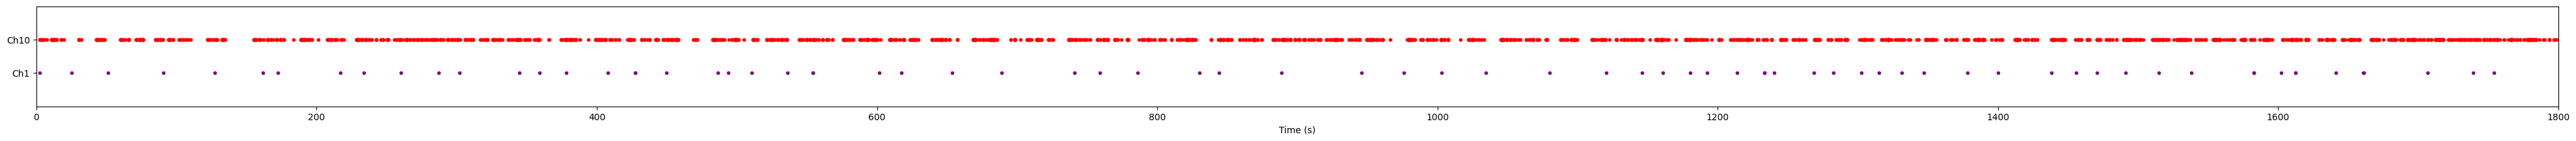

In [48]:
file = "2022-01-20T15-00-00vHip1_big_filtered_sorted.mat"
with h5py.File(file, "r") as hf:
    channel_1 = 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch1'
    
    spikes_ch1 = hf[channel_1]['times'][:]

with h5py.File(file, "r") as hf:
    channel_2 = 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch10'
    
    spikes_ch2 = hf[channel_2]['times'][:]
    
plt.figure(figsize=(50, 2))

plt.plot(spikes_ch1, np.ones_like(spikes), '.', color='purple') 
plt.plot(spikes_ch2, 2 * np.ones_like(spikes10), '.', color='red')   

plt.xlim([0,1800]) 
plt.ylim([0, 3])
plt.xlabel('Time (s)') 
plt.yticks([1, 2], ['Ch1', 'Ch10'])
plt.show()

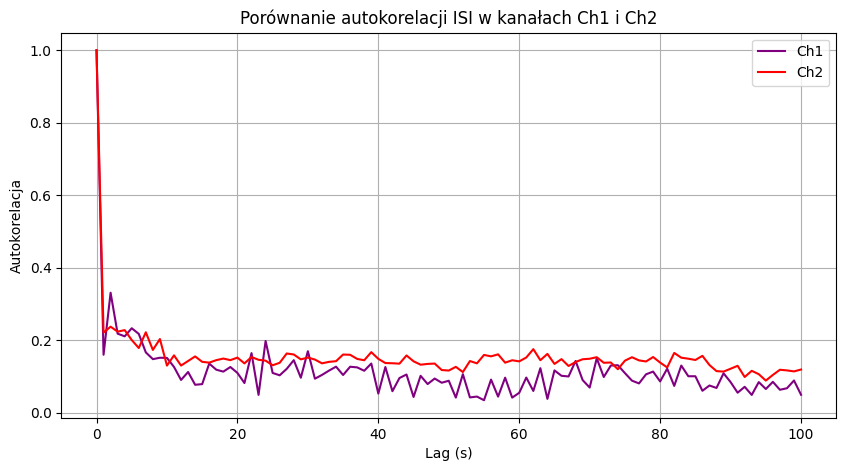

In [49]:
from numpy import correlate

isi_ch1 = np.diff(spikes_ch1).flatten()
isi_ch2 = np.diff(spikes_ch2).flatten()

def autocorr(x, lags):
    xcorr = correlate(x - x.mean(), x - x.mean(), 'full') 
    xcorr = xcorr[xcorr.size//2:] / xcorr.max()            
    return xcorr[:lags+1]

acf_ch1 = autocorr(isi_ch1, 100)
acf_ch2 = autocorr(isi_ch2, 100)

plt.figure(figsize=(10, 5))

plt.plot(acf_ch1, label="Ch1", color='purple')
plt.plot(acf_ch2, label="Ch2", color='red')

plt.xlabel("Lag (s)")
plt.ylabel("Autokorelacja")
plt.title("Porównanie autokorelacji ISI w kanałach Ch1 i Ch2")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(isi_ch1, isi_ch2)
print(f"Wynik testu t-Studenta: t_stat = {t_stat}, p_value = {p_value}")

Wynik testu t-Studenta: t_stat = 147.54178475868432, p_value = 0.0


KS test dla Ch1: statystyka = 0.15280685127138333, p-value = 4.201357910390329e-16
KS test dla Ch2: statystyka = 0.3006540919774773, p-value = 0.0


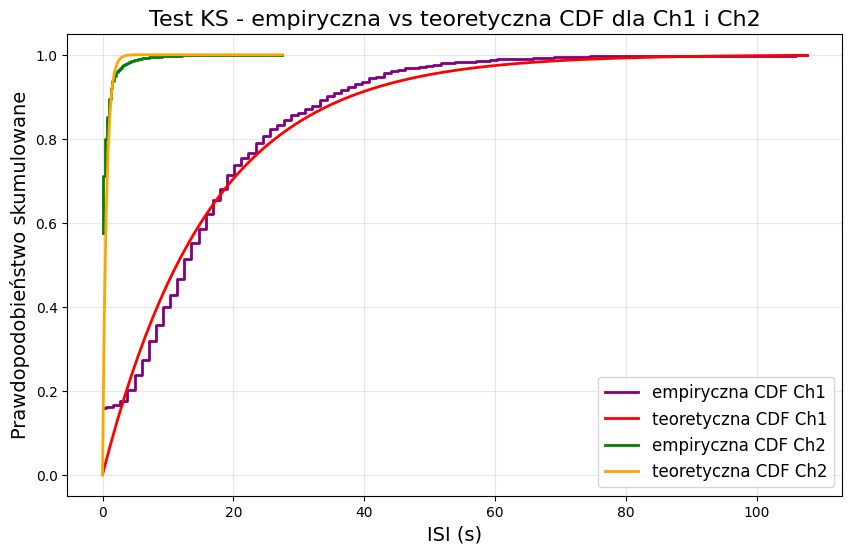

In [51]:
from scipy.stats import kstest

isi_ch1 = np.diff(spikes_ch1).flatten()
isi_ch2 = np.diff(spikes_ch2).flatten()

def compute_cdf(ISIs):
    obs_cdf = np.cumsum(np.histogram(ISIs, bins=100, density=True)[0])
    obs_cdf /= obs_cdf[-1]
    x_values = np.linspace(0, max(ISIs), len(obs_cdf))
    return x_values, obs_cdf

def theoretical_cdf(x_values, mean_isi):
    return 1 - np.exp(-x_values / mean_isi)

x_values_ch1, obs_cdf_ch1 = compute_cdf(isi_ch1)
x_values_ch2, obs_cdf_ch2 = compute_cdf(isi_ch2)

teo_cdf_ch1 = theoretical_cdf(x_values_ch1, np.mean(isi_ch1))
teo_cdf_ch2 = theoretical_cdf(x_values_ch2, np.mean(isi_ch2))

ks_stat_ch1, p_value_ch1 = kstest(isi_ch1, lambda x: 1 - np.exp(-x / np.mean(isi_ch1)))
ks_stat_ch2, p_value_ch2 = kstest(isi_ch2, lambda x: 1 - np.exp(-x / np.mean(isi_ch2)))

print(f"KS test dla Ch1: statystyka = {ks_stat_ch1}, p-value = {p_value_ch1}")
print(f"KS test dla Ch2: statystyka = {ks_stat_ch2}, p-value = {p_value_ch2}")

plt.figure(figsize=(10, 6))

plt.step(x_values_ch1, obs_cdf_ch1, where='mid', label='empiryczna CDF Ch1', color='purple', linewidth=2)
plt.plot(x_values_ch1, teo_cdf_ch1, label='teoretyczna CDF Ch1', color='red', linewidth=2)

plt.step(x_values_ch2, obs_cdf_ch2, where='mid', label='empiryczna CDF Ch2', color='green', linewidth=2)
plt.plot(x_values_ch2, teo_cdf_ch2, label='teoretyczna CDF Ch2', color='orange', linewidth=2)

plt.xlabel('ISI (s)', fontsize=14)
plt.ylabel('Prawdopodobieństwo skumulowane', fontsize=14)
plt.title('Test KS - empiryczna vs teoretyczna CDF dla Ch1 i Ch2', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()